# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Data, Preprocessing & Modeling

In [20]:
import pandas as pd


df = pd.read_csv(r'C:\Users\user\Desktop\git_hub\finished\ml\validation\data\wdbc.data.csv', header = None)
x = df.loc[:,[4,14]].values
y = df.loc[:,1].values

In [21]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y = le.fit_transform(y)
'''
le.classes_
le.transform(['M','B'])
'''

"\nle.classes_\nle.transform(['M','B'])\n"

In [22]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [23]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Test Accuracy:{:.3f}'.format(lr.score(x_test, y_test)))

Test Accuracy:0.921


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# K-fold Validation

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(x_train, y_train)

#ls_k = list(kfold.split(x_train,y_train))

In [12]:
scores = []
for k, (train, test) in enumerate(kfold):
    lr.fit(x_train[train], y_train[train])
    score = lr.score(x_train[test], y_train[test])
    scores.append(score)
    print('Fold:%2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

#print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.870
Fold: 2, Class dist.: [256 153], Acc: 0.935
Fold: 3, Class dist.: [256 153], Acc: 0.891
Fold: 4, Class dist.: [256 153], Acc: 0.935
Fold: 5, Class dist.: [256 153], Acc: 0.848
Fold: 6, Class dist.: [257 153], Acc: 0.911
Fold: 7, Class dist.: [257 153], Acc: 0.911
Fold: 8, Class dist.: [257 153], Acc: 0.822
Fold: 9, Class dist.: [257 153], Acc: 0.889
Fold:10, Class dist.: [257 153], Acc: 0.844


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [14]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10, n_jobs = 1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.86956522 0.93478261 0.89130435 0.93478261 0.84782609 0.91111111
 0.91111111 0.82222222 0.88888889 0.84444444]
CV accuracy: 0.886 +/- 0.037


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

# Learning Curve (in different training set sizes)

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
lr = LogisticRegression(penalty = 'l2', random_state = 1)
train_sizes, train_scores, test_scores = learning_curve(estimator = lr,
                                                        X = x_train, y = y_train,
                                                        train_sizes = np.linspace(0.1,1,12),
                                                        cv = 10, n_jobs = 1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [16]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

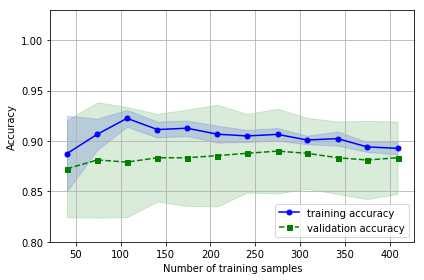

In [17]:
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o',
         markersize = 5, label = 'training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue', label = '')

plt.plot(train_sizes, test_mean,
         color = 'green', linestyle = '--',
         marker = 's', markersize = 5,
         label = 'validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green', label = '')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# Gridsearch for Hypetuning (Pipeline)

In [24]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


pipeline = Pipeline([
                    ('scaler', Normalizer()),                 
                    ('classifier', LogisticRegression(random_state = 0))
                     ])

parameters = {    
              'scaler': [Normalizer(), MinMaxScaler(), StandardScaler(), None],        
              'classifier__penalty': [ 'l1', 'l2'],
              'classifier__C': [1, 0.1, 0.01, 0.001]
              }

scoring = 'roc_auc'

n_splits = 5
cv = KFold(n_splits = n_splits, shuffle = True, random_state = 123457)

SearchCV = GridSearchCV(estimator = pipeline,
                        param_grid = parameters,
                        scoring = scoring, 
                        cv = cv,
                        return_train_score = True,
                        verbose = 1, 
                        n_jobs = -1)

In [26]:
SearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.8s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=123457, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', Normalizer(copy=True, norm='l2')), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'scaler': [Normalizer(copy=True, norm='l2'), MinMaxScaler(copy=True, feature_range=(0, 1)), StandardScaler(copy=True, with_mean=True, with_std=True), None], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [27]:
best_estimator = SearchCV.best_estimator_
best_params = SearchCV.best_params_
print(best_params)
print(SearchCV.best_score_)

{'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': None}
0.9576888755387529


In [28]:
y_test_pred = SearchCV.predict(x_test)
test_score = SearchCV.score(x_test, y_test) 
print(" test score ("+scoring+"):", test_score)

 test score (roc_auc): 0.9431216931216931


In [29]:
r_lr = SearchCV.cv_results_
print('parans:\n', r_lr['params'], '\n')
print('mean_test_score:\n', r_lr['mean_test_score'], '\n')
print('std_test_score:\n', r_lr['std_test_score'], '\n')
print('mean_train_score:\n', r_lr['mean_train_score'], '\n')
print('std_train_score:\n', r_lr['std_train_score'], '\n')

parans:
 [{'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': Normalizer(copy=True, norm='l2')}, {'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}, {'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}, {'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': None}, {'classifier__C': 1, 'classifier__penalty': 'l2', 'scaler': Normalizer(copy=True, norm='l2')}, {'classifier__C': 1, 'classifier__penalty': 'l2', 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}, {'classifier__C': 1, 'classifier__penalty': 'l2', 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}, {'classifier__C': 1, 'classifier__penalty': 'l2', 'scaler': None}, {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'scaler': Normalizer(copy=True, norm='l2')}, {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}, {'cla

# Validation Curve (in different parameters)

In [30]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(estimator = lr, X = x_train, y = y_train,
                                             param_name = 'C', param_range = param_range, cv = 10)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [31]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

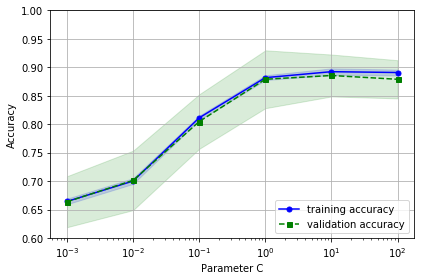

In [32]:
plt.plot(param_range, train_mean, 
         color = 'blue', marker = 'o', 
         markersize=5, label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha = 0.15, 
                 color = 'blue')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', 
         marker = 's', markersize = 5, 
         label = 'validation accuracy')
plt.fill_between(param_range, 
                 test_mean + test_std, 
                 test_mean - test_std, 
                 alpha = 0.15, 
                 color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

# Precision, Recall, F1 & ROC Curve

In [33]:
from sklearn.metrics import confusion_matrix


lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[71  1]
 [ 8 34]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


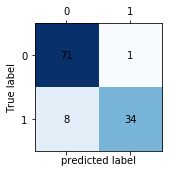

In [34]:
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap = plt.cm.Blues)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score


y_pred = lr.predict(x_test)
print('Precision: %.3f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.3f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1: %.3f' % f1_score(y_true = y_test, y_pred = y_pred))

Precision: 0.971
Recall: 0.810
F1: 0.883


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this war

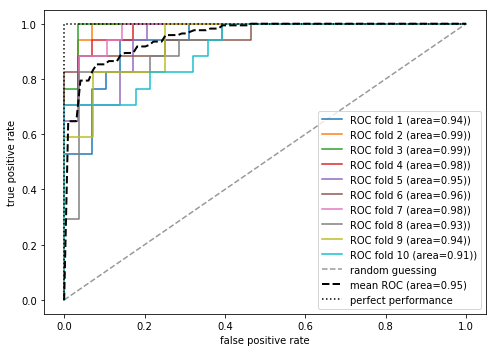

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp


lr = LogisticRegression()
cv = list(StratifiedKFold(n_splits=10, random_state=1).split(x_train, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = lr.fit(x_train[train], y_train[train]).predict_proba(x_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label = 'ROC fold %d (area=%0.2f))' % (i + 1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle = '--',
         color = (0.6, 0.6, 0.6),
         label = 'random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label = 'mean ROC (area=%0.2f)' % mean_auc, lw = 2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle = ':',
         color = 'black',
         label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc = 'lower right')

plt.tight_layout()

plt.show()